# Recursion

## Factorial

Contrasting a few terms (that are seemingly similar, but actually refer to different things):-

- *Recursion:* A function calling itself (usually with a different input).
- *Recurrence relation:* An equation that defines a sequence of numbers by relating each term to the previous term(s).
- *Reasoning:* Coming up with *intermediate steps* in order to solve a problem.

Superficially, it may seem that recursion and reasoning are the same, because both the concepts are about breaking down a problem into *sub-problems*. The difference is this: In recursion, the sub-problems are of the exact same type, whereas in reasoning, the intermediate steps are sub-problems of different types.

---

"Factorial" is an example of *one-branch recursion*. The factorial of `n` is defined as `n * (n - 1) * (n - 2) * ... * 1`.

In [1]:
# Iterative solution:
def factorial(n):
    result = 1
    while n >= 1:
        result *= n
        n -= 1
    return result

This algorithm has a time complexity of $O(n)$ and a space complexity of $O(1)$.

In [2]:
# Test:
print(factorial(0))
print(factorial(1))
print(factorial(2))
print(factorial(3))
print(factorial(4))
print(factorial(5))

1
1
2
6
24
120


Key insight behind recursive solution: `n! = n * (n - 1)!`

Recursion is all about breaking down a problem into sub-problems. In the above case, `(n - 1)!` is a sub-problem of `n!`.

Some flavors of recursion include (i) *divide & conquer* (sub-problems - most of which are independent - although it's ok for a small % of them to overlap) and (ii) *dynamic programming* (sequentially dependent sub-problems - the solutions to which are cached for use in other sub-problems - to avoid repetitions of the same calculations).

By far, the best way to represent recursion is by drawing a *recursion tree* (known as a *decision tree* when each recursive step is a binary decision). (Another way is by drawing the *call stack*.)

For the "factorial" problem, we are dividing the original problem into only one sub-problem (at each recursive step). This can be visualized in the form of a tree that has only one branch (at each recursive step).

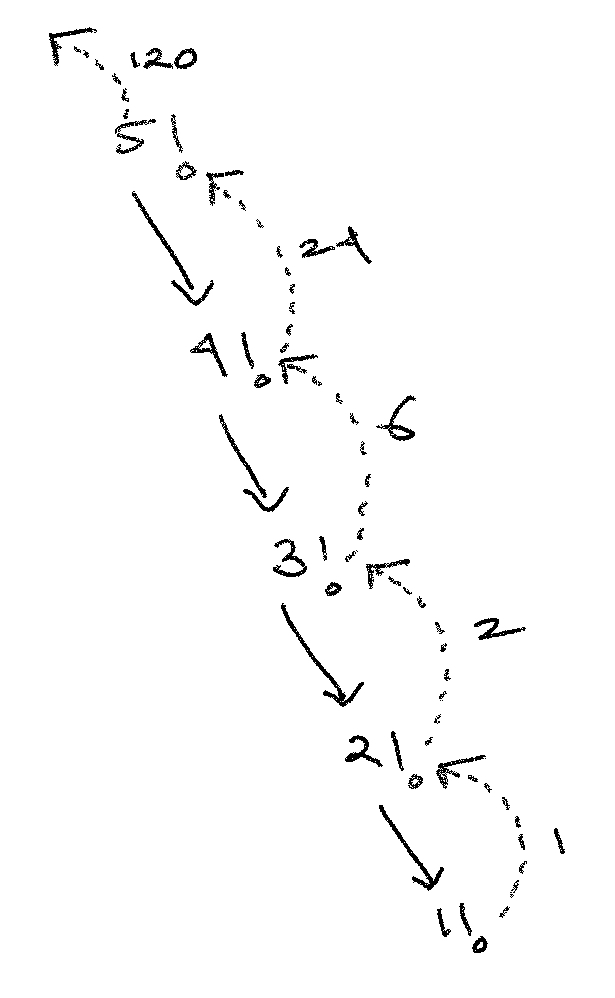

In [3]:
# Recursive solution:
def factorial(n):
    if n <= 1: # Base case (for the cases where `n` is `0` or `1`).
        return 1

    return n * factorial(n - 1) # Recursive case.

It can be difficult to determine the time complexity of this algorithm just by looking at the code. So draw the recursion tree! It's super useful. Looking at the above recursion tree, we see that calculating `5!` recursively entails making `5` computations - `4` recursive cases (multiplications) and `1` base case. (The height of the tree is `5`.) We conclude that the time complexity is $O(n)$. This is the same time complexity as the iterative solution.

The space complexity of the recursive solution is actually worse than that of its iterative counterpart. The space complexity of this algorithm is $O(n)$, because that's the maximum height of the call stack (during the execution of the algorithm).

**Note:** In this algorithm, we're not allocating memory for any data structures such as arrays or linked lists. If we have a recursive algorithm containing a data structure, we need to account for two things: (i) the memory consumed by the call stack and (ii) the memory consumed by the data structure. We then need to add these two parts to get the overall memory complexity.

**Exercise:** Draw the call stack. In the process, realize one important aspect about recursion: While the call to `factorial(n - 1)` is executing, the call to `factorial(n)` remains *on hold*, i.e., *alive*. Each function call that remains on hold takes up $O(1)$ memory.

In [4]:
# Test:
print(factorial(0))
print(factorial(1))
print(factorial(2))
print(factorial(3))
print(factorial(4))
print(factorial(5))

1
1
2
6
24
120


If we didn't have the base case, the function would continue to make recursive calls infinitely, leading to a *stack overflow error*.

**Definition:** A *stack overflow error* occurs when a computer program attempts to use more memory in the function call stack than has been allocated. This can happen when the function calling chain becomes too long, often due to infinite recursion.

### Reverse a Linked List

The intuition behind the recursive solution:

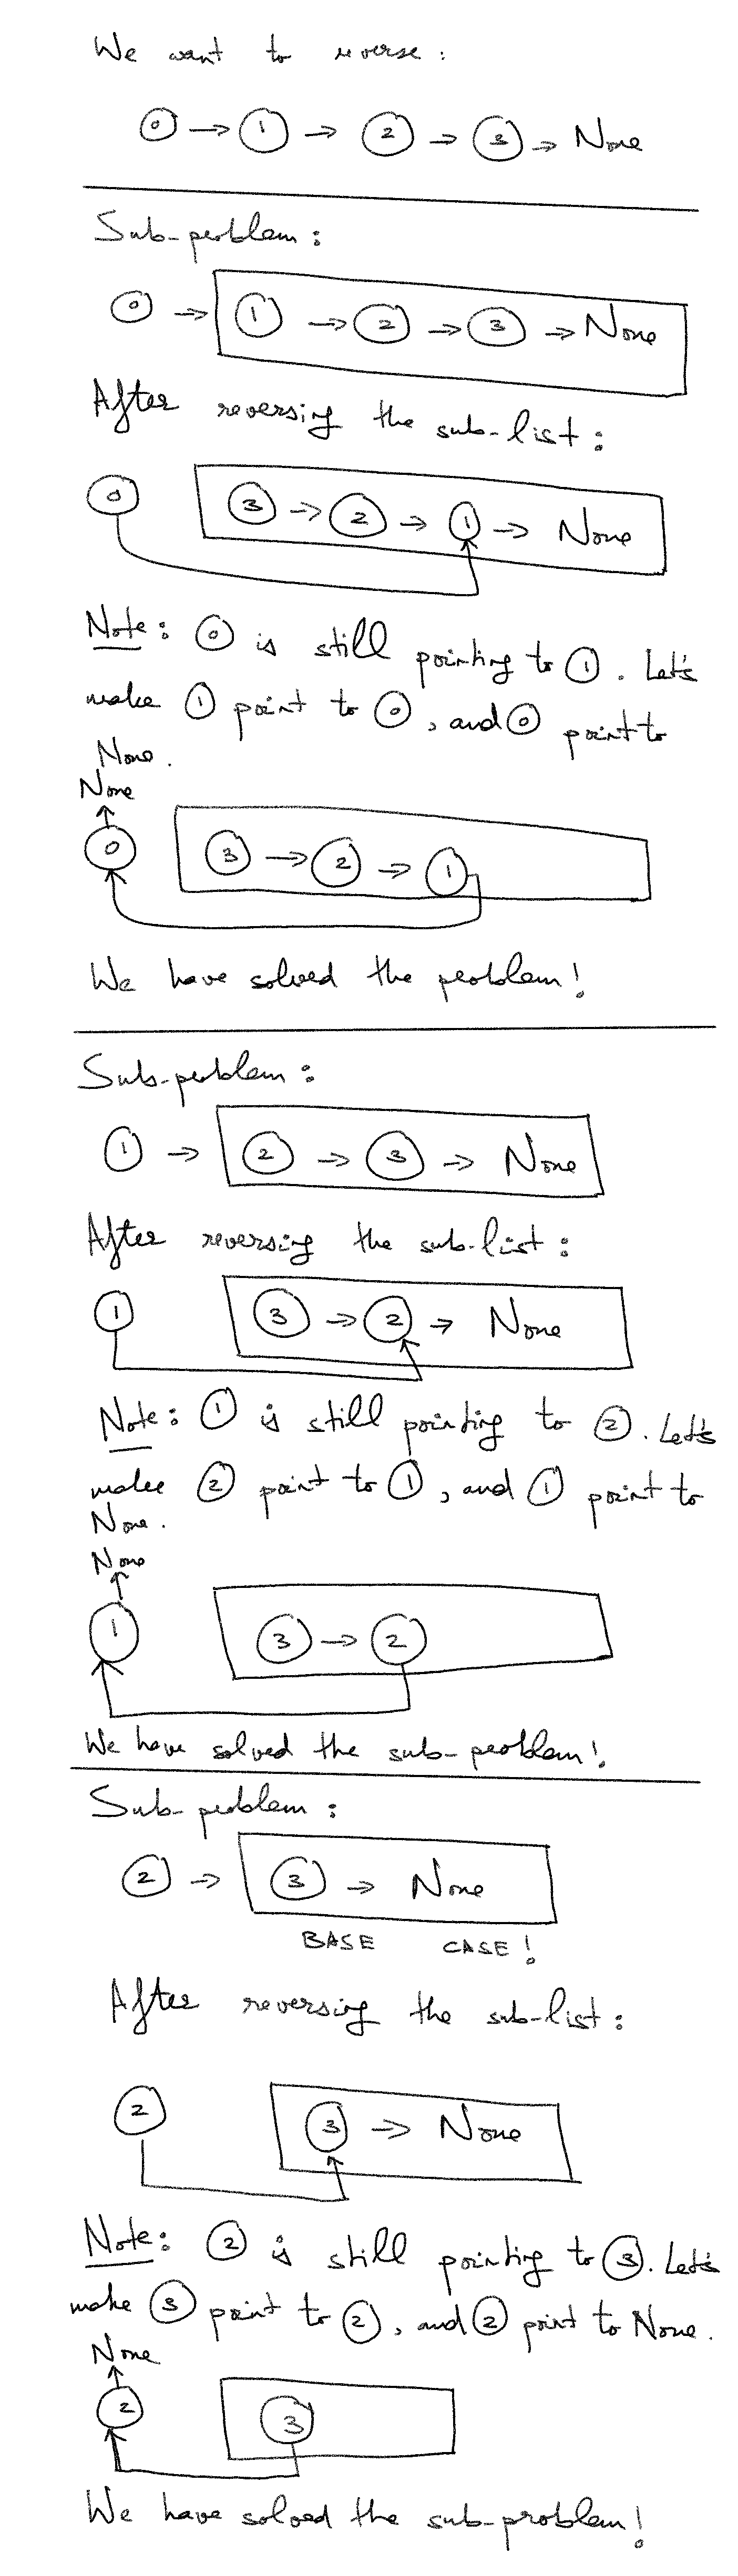

**Note:** For recursive linked list algorithms (such as this one), drawing the linked list (as well as it's sub-lists at each recursive step) provides more clarity than drawing the one-branch recursion tree or drawing the call stack.

In [5]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

In [6]:
# Inefficient but intuitive solution:
def reverseList(head):
    if head is None or head.next is None: # Edge case where linked list is empty OR base case.
        return head

    reversed_next = reverseList(head.next)
    new_tail = reversed_next # Initially, `new_tail` is pointing to the head of `reversed_next`.
    while new_tail.next is not None:
        new_tail = new_tail.next
    new_tail.next = head
    head.next = None
    return reversed_next

This algorithm has a time complexity of $O(n^2)$, because each time we solve a sub-problem (reverse the linked list starting at the `next` pointer of `head`), we have to traverse the entire reversed linked list to get to its tail. The shortest reversed linked list has a length of `1`, the second shortest reversed linked list has a length of `2`, the third shortest reversed linked list has a length of `3`, and so on. The formula for the first $n$ natural numbers is $1 + 2 + 3 + ... + n = n.\frac{n + 1}{2}$. Hence, the time complexity is $O(n^2)$.

The space complexity of this algorithm is $O(n)$.

In [7]:
# Test:
node0 = ListNode(0)
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node0.next = node1
node1.next = node2
node2.next = node3
head = node0

new_head = reverseList(head)

cur = new_head
while cur is not None:
    print(cur.val)
    cur = cur.next

3
2
1
0


In [8]:
# Test:
head = None

new_head = reverseList(head)
new_head is None

True

**Note:** The below solution gets rid of the `while` loop using a single insight: `head` is still pointing to its next node; this happens to be the tail of `reversed_next`. (This solution is WAY more intuitive than NeetCode's official recursive solution; hence the official solution has been deleted from this notebook.)

In [9]:
# Efficient and intuitive solution:
def reverseList(head):
    if head is None or head.next is None: # Edge case where linked list is empty OR base case.
        return head

    reversed_next = reverseList(head.next)
    new_tail = head.next # Note: `head` is still pointing to its next node; this happens to be the tail of `reversed_next`.
    new_tail.next = head
    head.next = None
    return reversed_next

This algorithm has a time complexity of $O(n)$ and a space complexity of $O(n)$.

In [10]:
# Test:
node0 = ListNode(0)
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node0.next = node1
node1.next = node2
node2.next = node3
head = node0

new_head = reverseList(head)

cur = new_head
while cur is not None:
    print(cur.val)
    cur = cur.next

3
2
1
0


In [11]:
# Test:
head = None

new_head = reverseList(head)
new_head is None

True

## Fibonacci Sequence

In [5]:
# Iterative solution:
def fib(n):
    arr = []
    for i in range(n + 1):
        if i <= 1:
            arr.append(i)
        else:
            arr.append(arr[-1] + arr[-2])
    return arr[-1]

This algorithm has a time complexity of $O(n)$ and a space complexity of $O(n)$.

In [6]:
# Test:
print(fib(0))
print(fib(1))
print(fib(2))
print(fib(3))
print(fib(4))
print(fib(5))

0
1
1
2
3
5


In [7]:
# Recursive solution:
def fib(n):
    if n <= 1: # Base case.
        return n

    return fib(n - 1) + fib(n - 2) # Recursive case.

This algorithm has a time complexity of $O(2^n)$.

**Exercise:** To understand this, draw the recursion tree of `fib(5)`. You will realize that the height of the tree $h$ is equal to $n$. The approximate number of nodes (computations) is $1 + 2 + 4 + ... + 2^n$, which results in a time complexity of $O(2^n)$ - since the last term is greater than all the previous terms combined.

Before trying to understand the space complexity of the algorithm, let's first clarify one point.

> In a two-branch recursion algorithm, the two branches are executed sequentially, not in parallel. When a function makes two recursive calls, the first call must complete before the second call begins executing. This behavior is due to the nature of how recursion operates within a single-threaded context. Even if both branches could theoretically run independently, they are still bound by the single-threaded execution model unless explicitly parallelized using threading or asynchronous programming techniques.

> In a typical recursive function, when two recursive calls are made (e.g., `functionA()` calls `functionB()` and `functionC()`), the execution proceeds as follows:

- The first recursive call (e.g., `functionB()`) is initiated.
- The current function's execution is paused until `functionB()` completes.
- Once `functionB()` returns, control goes back to the original function, which then initiates the second recursive call (e.g., `functionC()`).

The space complexity of the `fib` algorithm is driven by the height of the call stack. Since the function makes recursive calls to `fib(n - 1)` AND `fib(n - 2)`, the maximum height of the call stack is $n$, because the longest chain of calls will be the left branch (`fib(n - 1)`). Overall, the recursion tree of `fib(5)` has a height of `5`, and this height reduces by $1$ at each step. Thus, the space complexity is $O(n)$.

**Exercise:** Draw the recursion tree of `fib(5)` to convince yourself of the space complexity.

**Note:** Drawing the above recursion tree (along with the fact that in single-threaded contexts, the two-branches are executed sequentially) leads to an insight:

> Two-branch recursion is an example of postorder traversal (a type of DFS). However, the context isn't binary trees, but rather recursion trees (which are called *decision trees* if each branch of the recursion tree represents a binary decision).

This is why the nested function in the second solution to the **Climbing Stairs** problem (below) is named `dfs`.

**Question:** Is depth-first search an example of one-branch recursion or two-branch recursion?

**Answer from ChatGPT:**

---

Depth-First Search (DFS) can be implemented using both one-branch recursion and two-branch recursion, depending on the structure of the search.

<ins>One-Branch Recursion:</ins> When DFS is applied to a graph (an adjacency list), the recursion follows one child at a time. Example: Recursive DFS for a graph typically visits one adjacent node at a time, making it effectively one-branch recursion.

<ins>Two-Branch Recursion:</ins> When DFS is applied to a binary tree, each node has up to two children (left and right), leading to two recursive calls. Example: A standard DFS traversal for a binary tree is two-branch recursion.

---

So DFS in the context of (i) *binary trees* and (ii) *recursion trees* (of which *decision trees* are a special case) are examples of two-branch recursion. But DFS in the context of *graphs* is an example of one-branch recursion.

In [8]:
# Test:
print(fib(0))
print(fib(1))
print(fib(2))
print(fib(3))
print(fib(4))
print(fib(5))

0
1
1
2
3
5


### Climbing Stairs

In [ ]:
def climbStairs(n):
    def dfs(current_step):
        if current_step >= n:
            return current_step == n # Return 1 if current_step is 5; return 0 if current_step is 6.
        return dfs(current_step + 1) + dfs(current_step + 2)
    return dfs(0)

In [ ]:
# Test:
print(climbStairs(1))
print(climbStairs(2))
print(climbStairs(3))
print(climbStairs(4))
print(climbStairs(5))